In [ ]:
import os
import keras
import tensorflow as tf
import time
import numpy as np

In [2]:
path_to_file = tf.keras.utils.get_file('2199-h.htm','https://www.gutenberg.org/files/2199/2199-h/2199-h.htm')

In [3]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

In [4]:
print(f'Length of text: {len(text)} characters')

Length of text: 941564 characters


In [5]:
print(text[:10000])

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
  <head>
    <meta charset="UTF-8" />
    <title>The Project Gutenberg eBook of The Iliad, by Homer</title>
    <link rel="icon" href="images/cover.jpg" type="image/x-cover" />
<style> /* <![CDATA[ */

body { margin-right: 20%;
       margin-left: 20%;
       text-align: justify }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 175%; margin-top: 2em; margin-bottom: 2em;}
h3 {font-size: 150%; margin-top: 2em;}
h4,.ph4 {font-size: 120%;}
h5 {font-size: 110%;}

hr {width: 80%; margin-top: 2em; margin-bottom: 2em;}

div.chapter {page-break-before: always; margin-top: 4em;}

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

p.intro {fon

In [6]:
import matplotlib.pyplot as plt


In [7]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [8]:
encoded_text = tokenizer(text)
encoded_text = text.split()

Token indices sequence length is longer than the specified maximum sequence length for this model (212215 > 512). Running this sequence through the model will result in indexing errors


In [9]:
print(encoded_text)

['<!DOCTYPE', 'html>', '<html', 'xmlns="http://www.w3.org/1999/xhtml"', 'xml:lang="en"', 'lang="en">', '<head>', '<meta', 'charset="UTF-8"', '/>', '<title>The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Iliad,', 'by', 'Homer</title>', '<link', 'rel="icon"', 'href="images/cover.jpg"', 'type="image/x-cover"', '/>', '<style>', '/*', '<![CDATA[', '*/', 'body', '{', 'margin-right:', '20%;', 'margin-left:', '20%;', 'text-align:', 'justify', '}', 'h1,', 'h2,', 'h3,', 'h4,', 'h5', '{text-align:', 'center;', 'font-style:', 'normal;', 'font-weight:', 'normal;', 'line-height:', '1.5;', 'margin-top:', '.5em;', 'margin-bottom:', '.5em;}', 'h1', '{font-size:', '300%;', 'margin-top:', '0.6em;', 'margin-bottom:', '0.6em;', 'letter-spacing:', '0.12em;', 'word-spacing:', '0.2em;', 'text-indent:', '0em;}', 'h2', '{font-size:', '175%;', 'margin-top:', '2em;', 'margin-bottom:', '2em;}', 'h3', '{font-size:', '150%;', 'margin-top:', '2em;}', 'h4,.ph4', '{font-size:', '120%;}', 'h5', '{font-size:', '110%

In [10]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1026, 999, 9986, 13874, 16129, 1028, 1026, 16129, 20950, 3619, 1027, 1000, 8299, 1024, 1013, 1013, 7479, 1012, 1059, 2509, 1012, 8917, 1013, 2639, 1013, 1060, 11039, 19968, 1000, 20950, 1024, 11374, 1027, 1000, 4372, 1000, 11374, 1027, 1000, 4372, 1000, 1028, 1026, 2132, 1028, 1026, 18804, 25869, 13462, 1027, 1000, 21183, 2546, 1011, 1022, 1000, 1013, 1028, 1026, 2516, 1028, 1996, 2622, 9535, 11029, 26885, 1997, 1996, 6335, 28665, 1010, 2011, 11525, 1026, 1013, 2516, 1028, 1026, 4957, 2128, 2140, 1027, 1000, 12696, 1000, 17850, 12879, 1027, 1000, 4871, 1013, 3104, 1012, 16545, 2290, 1000, 2828, 1027, 1000, 3746, 1013, 1060, 1011, 3104, 1000, 1013, 1028, 1026, 2806, 1028, 1013, 1008, 1026, 999, 1031, 3729, 6790, 1031, 1008, 1013, 2303, 1063, 7785, 1011, 2157, 1024, 2322, 1003, 1025, 7785, 1011, 2187, 1024, 2322, 1003, 1025, 3793, 1011, 25705, 1024, 16114, 1065, 1044, 2487, 1010, 1044, 2475, 1010, 1044, 2509, 1010, 1044, 2549, 1010, 1044, 2629, 1063, 3793, 1011, 25705

In [11]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', '<', '!', 'doc', '##type', 'html', '>', '<', 'html', 'xml', '##ns', '=', '"', 'http', ':', '/', '/', 'www', '.', 'w', '##3', '.', 'org', '/', '1999', '/', 'x', '##ht', '##ml', '"', 'xml', ':', 'lang', '=', '"', 'en', '"', 'lang', '=', '"', 'en', '"', '>', '<', 'head', '>', '<', 'meta', 'char', '##set', '=', '"', 'ut', '##f', '-', '8', '"', '/', '>', '<', 'title', '>', 'the', 'project', 'gut', '##enberg', 'ebook', 'of', 'the', 'il', '##iad', ',', 'by', 'homer', '<', '/', 'title', '>', '<', 'link', 're', '##l', '=', '"', 'icon', '"', 'hr', '##ef', '=', '"', 'images', '/', 'cover', '.', 'jp', '##g', '"', 'type', '=', '"', 'image', '/', 'x', '-', 'cover', '"', '/', '>', '<', 'style', '>', '/', '*', '<', '!', '[', 'cd', '##ata', '[', '*', '/', 'body', '{', 'margin', '-', 'right', ':', '20', '%', ';', 'margin', '-', 'left', ':', '20', '%', ';', 'text', '-', 'align', ':', 'justify', '}', 'h', '##1', ',', 'h', '##2', ',', 'h', '##3', ',', 'h', '##4', ',', 'h', '##5', '{', 'text', '-'

In [12]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] <! doctype html > < html xmlns = " http : / / www. w3. org / 1999 / xhtml " xml : lang = " en " lang = " en " > < head > < meta charset = " utf - 8 " / > < title > the project gutenberg ebook of the iliad, by homer < / title > < link rel = " icon " href = " images / cover. jpg " type = " image / x - cover " / > < style > / * <! [ cdata [ * / body { margin - right : 20 % ; margin - left : 20 % ; text - align : justify } h1, h2, h3, h4, h5 { text - align : center ; font - style : normal ; font - weight : normal ; line - height : 1. 5 ; margin - top :. 5em ; margin - bottom :. 5em ; } h1 { font - size : 300 % ; margin - top : 0. 6em ; margin - bottom : 0. 6em ; letter - spacing : 0. 12em ; word - spacing : 0. 2em ; text - indent : 0em ; } h2 { font - size : 175 % ; margin - top : 2em ; margin - bottom : 2em ; } h3 { font - size : 150 % ; margin - top : 2em ; } h4,. ph4 { font - size : 120 % ; } h5 { font - size : 110 % ; } hr { width : 80 % ; margin - top : 2em ; margin - bottom : 

In [13]:
def tokenize(batch): 
    return tokenize(batch["text"], padding = True, truncation = True)

In [14]:
import torch
import torch.nn.functional as F
import datasets
from datasets import load_dataset



In [15]:
from textblob import TextBlob
blob = TextBlob(text)

In [16]:
sentiment = blob.sentiment.polarity
print(sentiment)

0.1283101904786771


In [17]:
print(text)

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
  <head>
    <meta charset="UTF-8" />
    <title>The Project Gutenberg eBook of The Iliad, by Homer</title>
    <link rel="icon" href="images/cover.jpg" type="image/x-cover" />
<style> /* <![CDATA[ */

body { margin-right: 20%;
       margin-left: 20%;
       text-align: justify }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 175%; margin-top: 2em; margin-bottom: 2em;}
h3 {font-size: 150%; margin-top: 2em;}
h4,.ph4 {font-size: 120%;}
h5 {font-size: 110%;}

hr {width: 80%; margin-top: 2em; margin-bottom: 2em;}

div.chapter {page-break-before: always; margin-top: 4em;}

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

p.intro {fon

In [18]:
from datasets import load_dataset
emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/Hp/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [20]:
train_dataset = emotions['train']

In [21]:
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [22]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

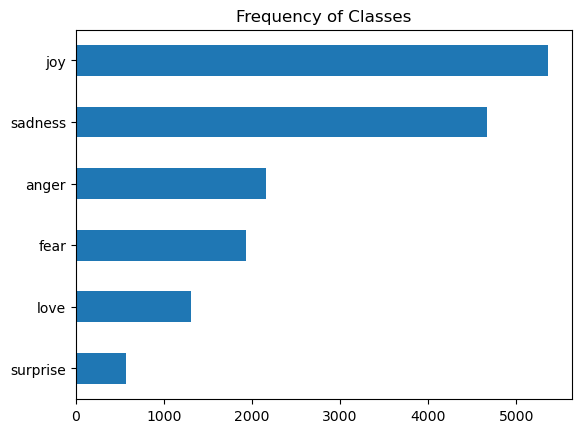

In [23]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [24]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

NameError: name 'device' is not defined

In [25]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [26]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
from transformers import pipeline

# Change `transformersbook` to your Hub username
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
preds = classifier(tokens, return_all_scores=True)

C:\Users\Hp\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{Iliad sentiment analysis}"')
plt.ylabel("Class probability (%)")
plt.show()